In [352]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will lis|t all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sanbercode-data-science/Pendapatan_test.csv
/kaggle/input/sanbercode-data-science/Pendapatan.csv


In [353]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='deep')

In [354]:
train_df = pd.read_csv('../input/sanbercode-data-science/Pendapatan.csv')
test_df = pd.read_csv('../input/sanbercode-data-science/Pendapatan_test.csv')
combine = [train_df, test_df]

In [355]:
train_df.isnull().sum()

id                       0
Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
Gaji                     0
dtype: int64

In [356]:
test_df.isnull().sum()

id                       0
Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
dtype: int64

In [357]:
print(train_df.columns.values)

['id' 'Umur' 'Kelas Pekerja' 'Berat Akhir' 'Pendidikan'
 'Jmlh Tahun Pendidikan' 'Status Perkawinan' 'Pekerjaan' 'Jenis Kelamin'
 'Keuntungan Kapital' 'Kerugian Capital' 'Jam per Minggu' 'Gaji']


In [358]:
train_df.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,59,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,1640,52,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,45206,52,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,16154,45,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,43023,28,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1


In [359]:
train_df.tail()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
38388,46220,47,Pekerja Bebas Bukan Perusahan,148169,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,0
38389,33268,69,Pekerja Bebas Perusahaan,264722,D3,12,Menikah,Sales,Laki2,0.0,0.0,40.0,1
38390,44845,24,Pekerja Bebas Bukan Perusahan,31606,Sarjana,13,Menikah,Spesialis,Perempuan,0.0,0.0,20.0,1
38391,4517,47,Wiraswasta,197836,SMA,9,Menikah,Sales,Laki2,0.0,0.0,45.0,0
38392,38693,45,Wiraswasta,243743,Sarjana,13,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,60.0,1


In [360]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38393 entries, 0 to 38392
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38393 non-null  int64  
 1   Umur                   38393 non-null  int64  
 2   Kelas Pekerja          38393 non-null  object 
 3   Berat Akhir            38393 non-null  int64  
 4   Pendidikan             38393 non-null  object 
 5   Jmlh Tahun Pendidikan  38393 non-null  int64  
 6   Status Perkawinan      38393 non-null  object 
 7   Pekerjaan              38393 non-null  object 
 8   Jenis Kelamin          38393 non-null  object 
 9   Keuntungan Kapital     38393 non-null  float64
 10  Kerugian Capital       38393 non-null  float64
 11  Jam per Minggu         38393 non-null  float64
 12  Gaji                   38393 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 3.8+ MB
________________________________________
<class '

In [361]:
train_df.describe()

,id,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
count,38393.000000,38393.000000,3.839300e+04,38393.000000,3.839300e+04,3.839300e+04,38393.000000,38393.000000
mean,24015.248535,38.673925,1.897238e+05,10.082828,1.518659e+07,1.212665e+06,40.440627,0.239497
std,13872.059919,13.694678,1.055764e+05,2.574543,1.044373e+08,5.613945e+06,12.382695,0.426782
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,11989.000000,28.000000,1.177510e+05,9.000000,0.000000e+00,0.000000e+00,40.000000,0.000000
50%,24050.000000,37.000000,1.783850e+05,10.000000,0.000000e+00,0.000000e+00,40.000000,0.000000
75%,36031.000000,48.000000,2.376300e+05,12.000000,0.000000e+00,0.000000e+00,45.000000,0.000000
max,47991.000000,90.000000,1.490400e+06,16.000000,1.399986e+09,6.098400e+07,99.000000,1.000000


In [362]:
(train_df=='?').sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


id                          0
Umur                        0
Kelas Pekerja            2204
Berat Akhir                 0
Pendidikan                  0
Jmlh Tahun Pendidikan       0
Status Perkawinan           0
Pekerjaan                2210
Jenis Kelamin               0
Keuntungan Kapital          0
Kerugian Capital            0
Jam per Minggu              0
Gaji                        0
dtype: int64

In [363]:
(test_df=='?').sum()

id                         0
Umur                       0
Kelas Pekerja            552
Berat Akhir                0
Pendidikan                 0
Jmlh Tahun Pendidikan      0
Status Perkawinan          0
Pekerjaan                554
Jenis Kelamin              0
Keuntungan Kapital         0
Kerugian Capital           0
Jam per Minggu             0
dtype: int64

In [364]:
train_df.describe(include=['O'])

,Kelas Pekerja,Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin
count,38393,38393,38393,38393,38393
unique,9,16,6,15,2
top,Wiraswasta,SMA,Menikah,Spesialis,Laki2
freq,26589,12430,17640,4911,25708


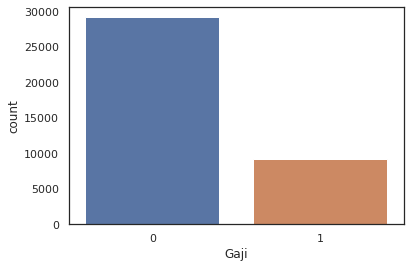

In [365]:
sns.countplot(train_df['Gaji'],label="Count")
plt.show()

In [366]:
train_df[['Status Perkawinan', 'Gaji']].groupby(['Status Perkawinan'], as_index=False).mean().sort_values(by='Gaji', ascending=False)

,Status Perkawinan,Gaji
4,Menikah,0.445238
5,Menikah LDR,0.113027
2,Cerai,0.101538
3,Janda,0.075552
1,Berpisah,0.071488
0,Belum Pernah Menikah,0.045771


In [367]:
train_df[['Jenis Kelamin', 'Gaji']].groupby(['Jenis Kelamin'], as_index=False).mean().sort_values(by='Gaji', ascending=False)

,Jenis Kelamin,Gaji
0,Laki2,0.302863
1,Perempuan,0.111076


In [368]:
train_df[['Pekerjaan', 'Gaji']].groupby(['Pekerjaan'], as_index=False).mean().sort_values(by='Gaji', ascending=False)

,Pekerjaan,Gaji
2,Ekesekutif Managerial,0.473695
11,Spesialis,0.450417
14,Tentara,0.363636
6,Penjaga,0.306540
13,Tech-support,0.291444
9,Sales,0.269026
7,Perbaikan Kerajinan,0.222431
12,Supir,0.206025
5,Pemuka Agama,0.142922
3,Mesin Inspeksi,0.129412


In [369]:
train_df[['Pendidikan', 'Gaji']].groupby(['Pendidikan'], as_index=False).mean().sort_values(by='Gaji', ascending=False)

,Pendidikan,Gaji
15,Sekolah Professional,0.744745
9,Doktor,0.737945
10,Master,0.544673
14,Sarjana,0.414399
8,D4,0.260137
7,D3,0.257937
11,Pendidikan Tinggi,0.186540
13,SMA,0.157442
2,12th,0.074656
5,7th-8th,0.066482


In [370]:
train_df[['Kelas Pekerja', 'Gaji']].groupby(['Kelas Pekerja'], as_index=False).mean().sort_values(by='Gaji', ascending=False)

,Kelas Pekerja,Gaji
2,Pekerja Bebas Perusahaan,0.553903
5,Pemerintah Provinsi,0.401596
3,Pemerintah Lokal,0.296251
1,Pekerja Bebas Bukan Perusahan,0.275716
4,Pemerintah Negara,0.271691
8,Wiraswasta,0.217270
6,Tanpa di Bayar,0.125000
0,?,0.097550
7,Tidak Pernah Bekerja,0.000000


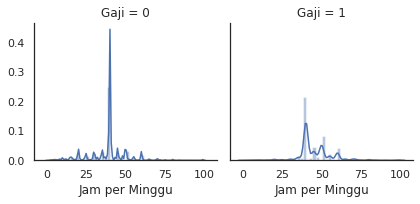

In [371]:
g = sns.FacetGrid(train_df, col='Gaji')
g = g.map(sns.distplot, "Jam per Minggu")
plt.show()

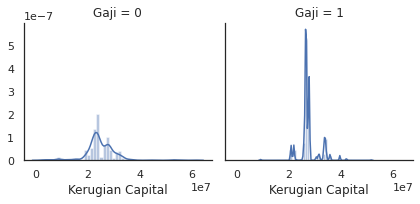

In [372]:
kerugian=train_df.loc[train_df['Kerugian Capital'] > 0].copy()
g = sns.FacetGrid(kerugian, col='Gaji')
g = g.map(sns.distplot, "Kerugian Capital")
plt.show()

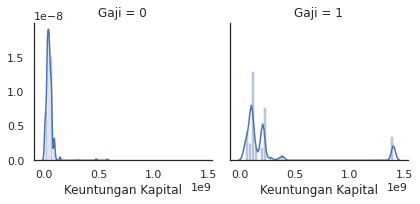

In [373]:
keuntungan=train_df.loc[train_df['Keuntungan Kapital'] > 0].copy()
g = sns.FacetGrid(keuntungan, col='Gaji')
g = g.map(sns.distplot, "Keuntungan Kapital")
plt.show()

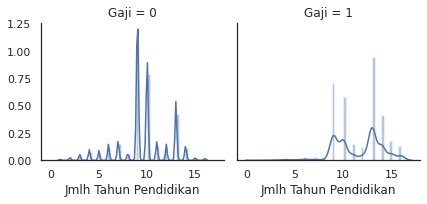

In [374]:
g = sns.FacetGrid(train_df, col='Gaji')
g = g.map(sns.distplot, "Jmlh Tahun Pendidikan")
plt.show()

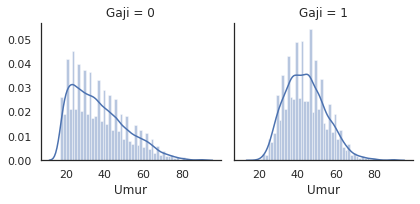

In [375]:
g = sns.FacetGrid(train_df, col='Gaji')
g = g.map(sns.distplot, "Umur")
plt.show()

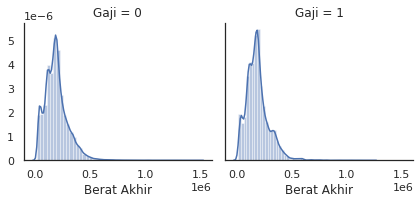

In [376]:
g = sns.FacetGrid(train_df, col='Gaji')
g = g.map(sns.distplot, "Berat Akhir")
plt.show()

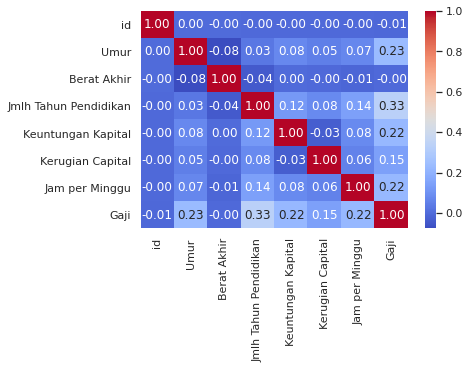

In [377]:
g = sns.heatmap(train_df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


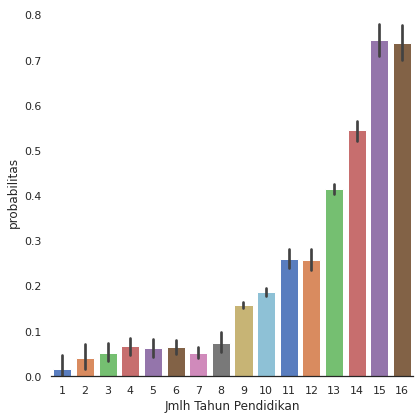

In [378]:
g = sns.factorplot(x="Jmlh Tahun Pendidikan",y="Gaji",data=train_df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("probabilitas")

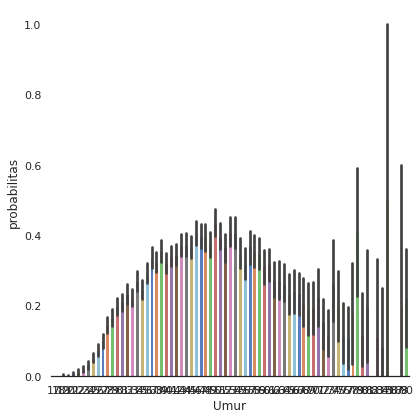

In [379]:
g = sns.factorplot(x="Umur",y="Gaji",data=train_df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("probabilitas")

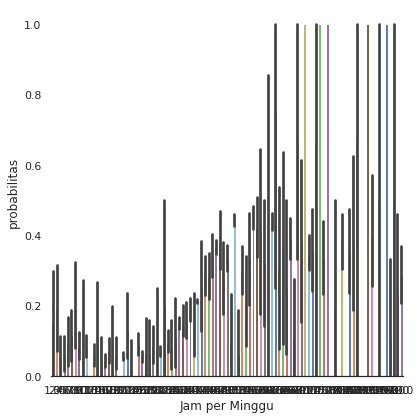

In [380]:
g = sns.factorplot(x="Jam per Minggu",y="Gaji",data=train_df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("probabilitas")

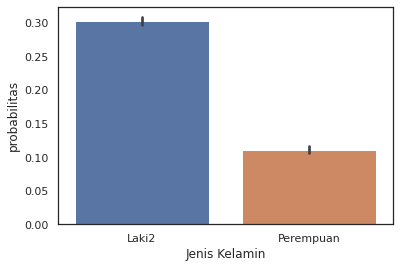

In [381]:
g = sns.barplot(x="Jenis Kelamin",y="Gaji",data=train_df)
g = g.set_ylabel("probabilitas")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


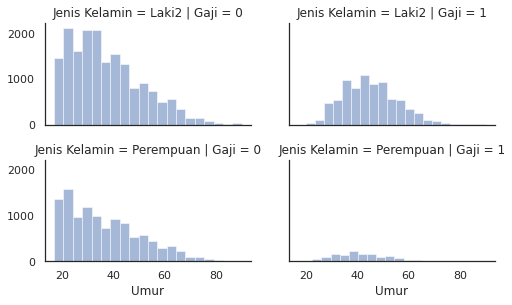

In [382]:
grid = sns.FacetGrid(train_df, col='Gaji', row='Jenis Kelamin', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Umur', alpha=.5, bins=20)
grid.add_legend();

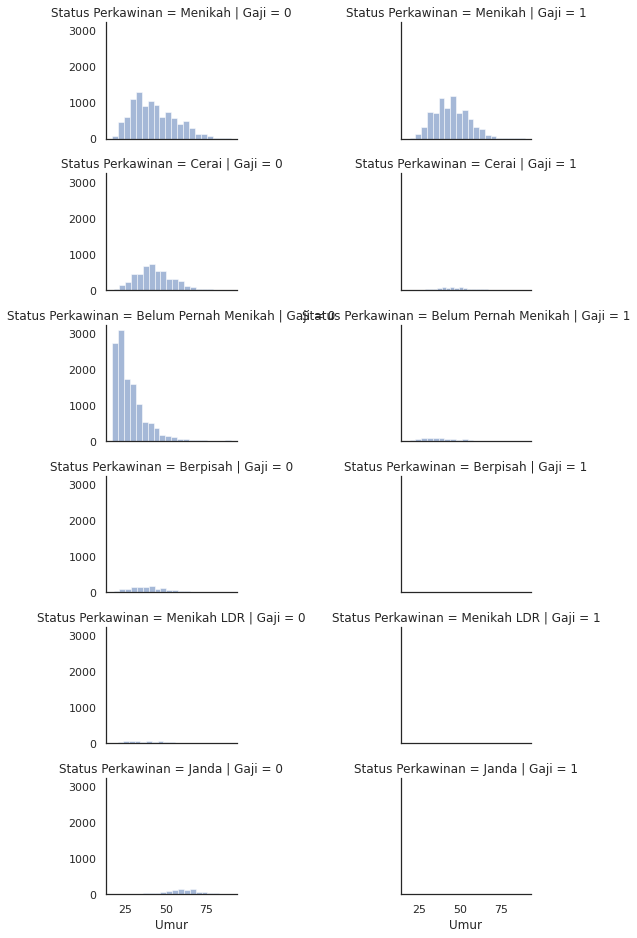

In [383]:
grid = sns.FacetGrid(train_df, col='Gaji', row='Status Perkawinan', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Umur', alpha=.5, bins=20)
grid.add_legend();

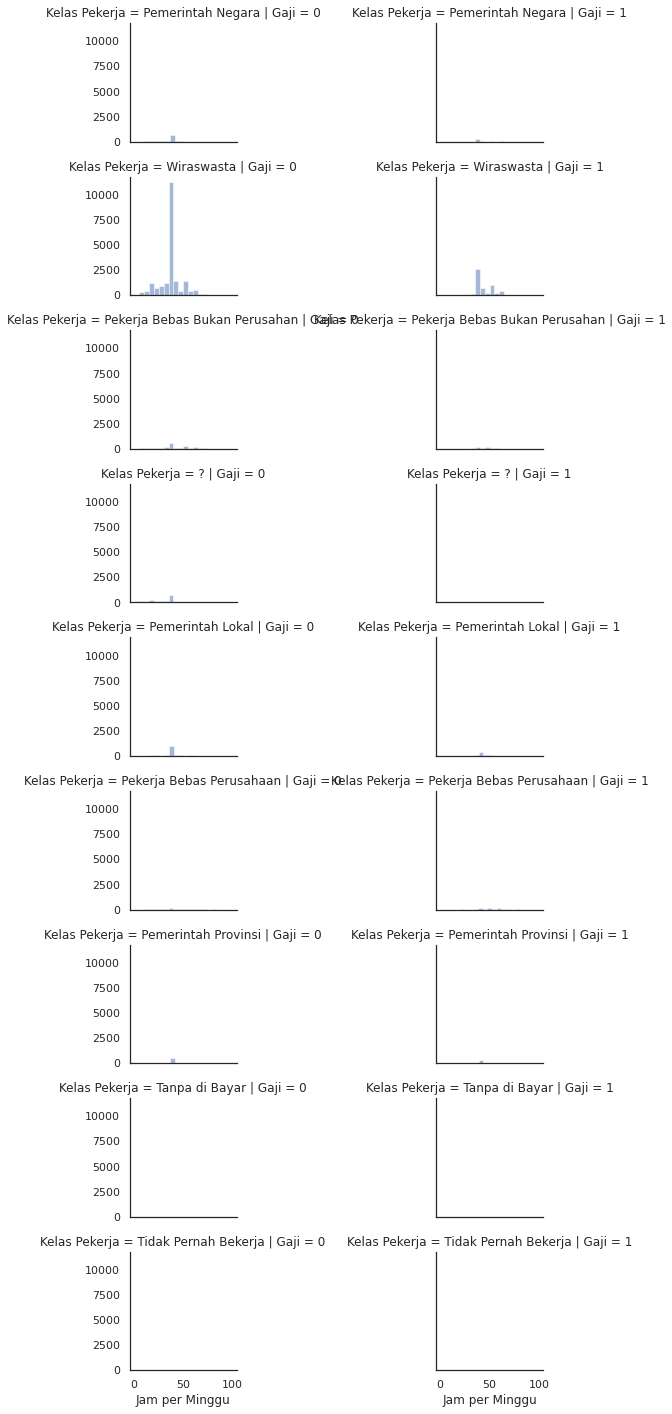

In [384]:
grid = sns.FacetGrid(train_df, col='Gaji', row='Kelas Pekerja', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Jam per Minggu', alpha=.5, bins=20)
grid.add_legend();

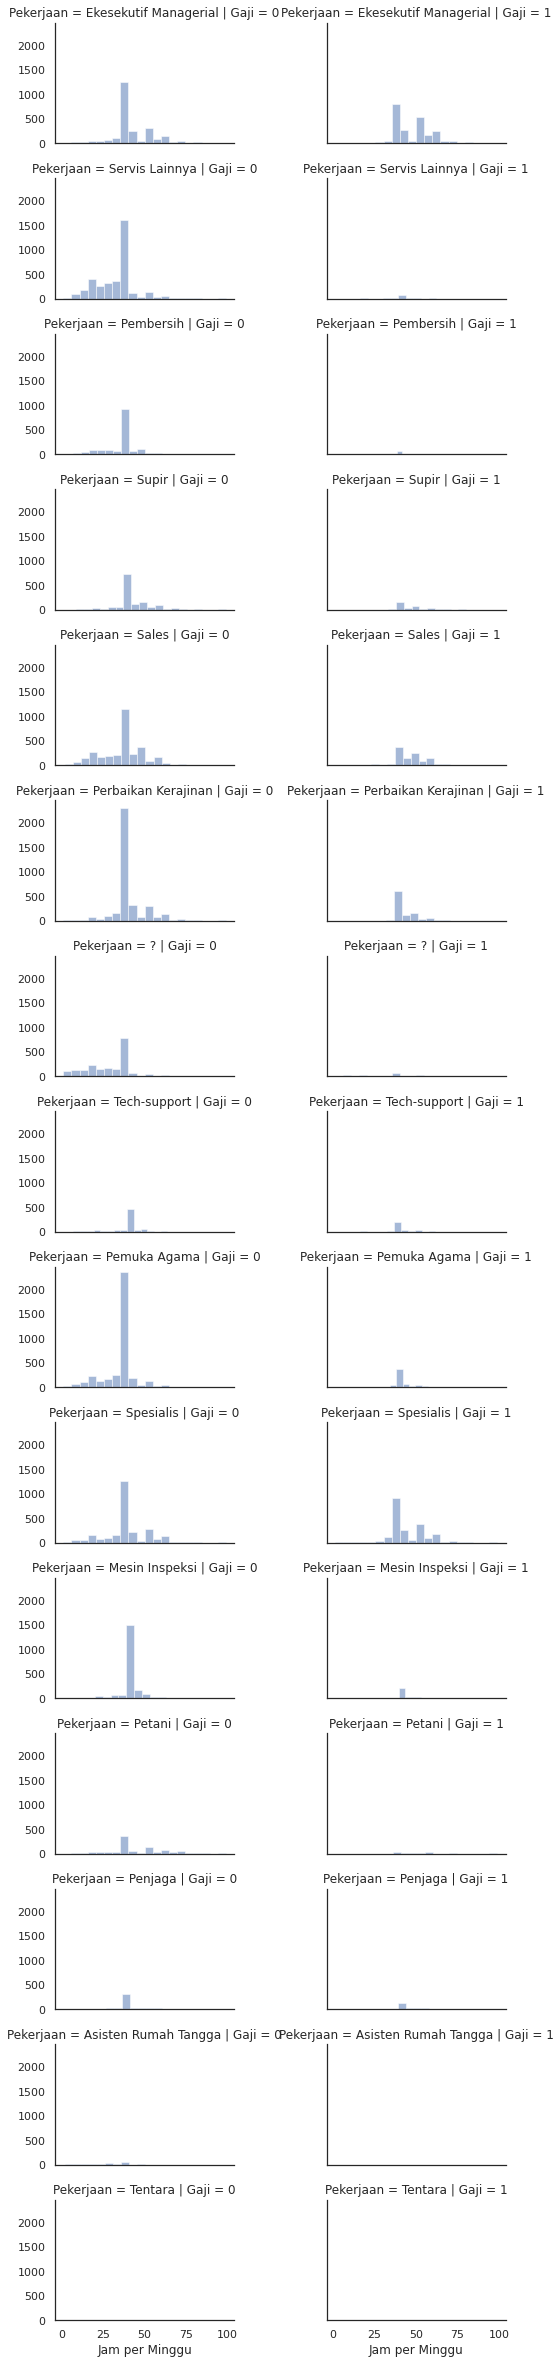

In [385]:
grid = sns.FacetGrid(train_df, col='Gaji', row='Pekerjaan', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Jam per Minggu', alpha=.5, bins=20)
grid.add_legend();

In [386]:
train_df

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,59,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,1640,52,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,45206,52,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,16154,45,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,43023,28,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38388,46220,47,Pekerja Bebas Bukan Perusahan,148169,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,0
38389,33268,69,Pekerja Bebas Perusahaan,264722,D3,12,Menikah,Sales,Laki2,0.0,0.0,40.0,1
38390,44845,24,Pekerja Bebas Bukan Perusahan,31606,Sarjana,13,Menikah,Spesialis,Perempuan,0.0,0.0,20.0,1
38391,4517,47,Wiraswasta,197836,SMA,9,Menikah,Sales,Laki2,0.0,0.0,45.0,0


In [387]:
# umur = pd.qcut(train_df['Umur'], q=10, duplicates='drop')
# train_df['Umur']=umur
# train_df.groupby(['Umur'], as_index=False).mean().sort_values(by='Umur', ascending=True)

In [388]:
# untung = pd.qcut(train_df['Keuntungan Kapital'], q=10, duplicates='drop')
# train_df['Keuntungan Kapital']=untung
# train_df.groupby(['Keuntungan Kapital'], as_index=False).mean().sort_values(by='Keuntungan Kapital', ascending=True)

In [389]:
# train_df['Untung']=0
# train_df.loc[(train_df['Keuntungan Kapital']<=1000) ,'Untung']= 0
# train_df.loc[(train_df['Keuntungan Kapital']>1000) & (train_df['Keuntungan Kapital']>=5000) ,'Untung']=1
# train_df.loc[(train_df['Keuntungan Kapital']>5000) & (train_df['Keuntungan Kapital']>=50000) ,'Untung']=2
# train_df.loc[(train_df['Keuntungan Kapital']>50000) & (train_df['Keuntungan Kapital']>=102172000) ,'Untung']= 3

In [390]:
# for dataset in combine:    
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#     dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
#     dataset.loc[ dataset['Age'] > 64, 'Age']
# train_df.head()

In [391]:
train_df = train_df.drop(['id','Pendidikan','Berat Akhir'], axis=1)

In [393]:
testid = test_df['id']
test_df = test_df.drop(['id','Pendidikan','Berat Akhir'], axis=1)

In [394]:
numfeat = train_df.select_dtypes(exclude=['object'])
numfeat = list(numfeat.columns)

In [395]:
catfeat = train_df.select_dtypes(include=['object'])
catfeat = list(catfeat.columns)

In [396]:
X = train_df.drop(['Gaji'], axis=1)
Y = test_df.copy()
y = train_df['Gaji']

In [397]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(X['Pekerjaan'])
label3 = le.transform(Y['Pekerjaan'])
le2 = LabelEncoder()
label2 = le2.fit_transform(X['Kelas Pekerja'])
label4 = le2.transform(Y['Kelas Pekerja'])

In [398]:
X['Pekerjaan'] = label

In [399]:
X['Kelas Pekerja'] = label2

In [400]:
Y['Pekerjaan'] = label3

In [401]:
Y['Kelas Pekerja'] = label4

In [402]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'?': 0, 'Asisten Rumah Tangga': 1, 'Ekesekutif Managerial': 2, 'Mesin Inspeksi': 3, 'Pembersih': 4, 'Pemuka Agama': 5, 'Penjaga': 6, 'Perbaikan Kerajinan': 7, 'Petani': 8, 'Sales': 9, 'Servis Lainnya': 10, 'Spesialis': 11, 'Supir': 12, 'Tech-support': 13, 'Tentara': 14}


In [403]:
le_name_mapping = dict(zip(le2.classes_, le2.transform(le2.classes_)))
print(le_name_mapping)

{'?': 0, 'Pekerja Bebas Bukan Perusahan': 1, 'Pekerja Bebas Perusahaan': 2, 'Pemerintah Lokal': 3, 'Pemerintah Negara': 4, 'Pemerintah Provinsi': 5, 'Tanpa di Bayar': 6, 'Tidak Pernah Bekerja': 7, 'Wiraswasta': 8}


In [404]:
catfeat.remove('Kelas Pekerja')
catfeat.remove('Pekerjaan')
catfeat

['Status Perkawinan', 'Jenis Kelamin']

In [405]:
numfeat.remove('Gaji')
numfeat

['Umur',
 'Jmlh Tahun Pendidikan',
 'Keuntungan Kapital',
 'Kerugian Capital',
 'Jam per Minggu']

In [406]:
train_df

,Umur,Kelas Pekerja,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,59,Pemerintah Negara,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,52,Wiraswasta,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,52,Pekerja Bebas Bukan Perusahan,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,45,Wiraswasta,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,28,Wiraswasta,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1
...,...,...,...,...,...,...,...,...,...,...
38388,47,Pekerja Bebas Bukan Perusahan,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,0
38389,69,Pekerja Bebas Perusahaan,12,Menikah,Sales,Laki2,0.0,0.0,40.0,1
38390,24,Pekerja Bebas Bukan Perusahan,13,Menikah,Spesialis,Perempuan,0.0,0.0,20.0,1
38391,47,Wiraswasta,9,Menikah,Sales,Laki2,0.0,0.0,45.0,0


In [407]:
X

,Umur,Kelas Pekerja,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,59,4,14,Menikah,2,Laki2,0.0,0.0,50.0
1,52,8,9,Cerai,10,Perempuan,0.0,0.0,38.0
2,52,1,9,Cerai,2,Perempuan,0.0,0.0,99.0
3,45,8,9,Belum Pernah Menikah,4,Perempuan,0.0,0.0,40.0
4,28,8,9,Belum Pernah Menikah,12,Laki2,0.0,0.0,45.0
...,...,...,...,...,...,...,...,...,...
38388,47,1,9,Menikah,7,Laki2,0.0,0.0,40.0
38389,69,2,12,Menikah,9,Laki2,0.0,0.0,40.0
38390,24,1,13,Menikah,11,Perempuan,0.0,0.0,20.0
38391,47,8,9,Menikah,9,Laki2,0.0,0.0,45.0


In [408]:
Y

,Umur,Kelas Pekerja,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,30,3,11,Cerai,5,Perempuan,0.0,0.0,40.0
1,28,8,9,Menikah,3,Laki2,0.0,0.0,50.0
2,34,5,10,Menikah,5,Laki2,0.0,0.0,40.0
3,51,8,10,Menikah,2,Laki2,0.0,28028000.0,40.0
4,20,0,10,Belum Pernah Menikah,0,Perempuan,0.0,22428000.0,40.0
...,...,...,...,...,...,...,...,...,...
9594,58,4,5,Menikah,8,Laki2,0.0,0.0,40.0
9595,45,1,7,Menikah,7,Laki2,0.0,0.0,50.0
9596,20,8,10,Belum Pernah Menikah,10,Perempuan,0.0,0.0,32.0
9597,41,3,9,Berpisah,5,Perempuan,0.0,0.0,40.0


In [409]:
simpen = X[['Pekerjaan', 'Kelas Pekerja']]

In [410]:
simpen2 = Y[['Pekerjaan', 'Kelas Pekerja']]

In [411]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import time

encoder = ce.OneHotEncoder(cols=X[catfeat], use_cat_names=True)
encoded = encoder.fit_transform(X[catfeat])
encoded2 = encoder.transform(Y[catfeat])

In [412]:
cols = numfeat
scaler = RobustScaler()
scaled = scaler.fit_transform(X[cols])
scaled = pd.DataFrame(scaled, columns=cols)
scaled2 = scaler.transform(Y[cols])
scaled2 = pd.DataFrame(scaled2, columns=cols)

In [413]:
kolom=encoded.columns.to_list()+scaled.columns.to_list()

In [414]:
kolom2=encoded2.columns.to_list()+scaled2.columns.to_list()

In [415]:
X = np.concatenate([encoded, scaled], axis=1)
X = pd.DataFrame(X, columns=kolom)

In [416]:
Y = np.concatenate([encoded2, scaled2], axis=1)
Y = pd.DataFrame(Y, columns=kolom2)

In [417]:
X = pd.concat([X, simpen], axis=1, sort=False)

In [418]:
Y = pd.concat([Y, simpen2], axis=1, sort=False)

In [419]:
X['Kelas Pekerja'] = X['Kelas Pekerja'].replace(0, np.nan)
Y['Kelas Pekerja'] = Y['Kelas Pekerja'].replace(0, np.nan)

In [420]:
X['Pekerjaan'] = X['Pekerjaan'].replace(0, np.nan)
Y['Pekerjaan'] = Y['Pekerjaan'].replace(0, np.nan)

In [421]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
X = imp_mean.fit_transform(X)
Y = imp_mean.transform(Y)

In [422]:
X = pd.DataFrame(X, columns=kolom+['Pekerjaan', 'Kelas Pekerja'])

In [423]:
Y = pd.DataFrame(Y, columns=kolom2+['Pekerjaan', 'Kelas Pekerja'])

In [424]:
X

,Status Perkawinan_Menikah,Status Perkawinan_Cerai,Status Perkawinan_Belum Pernah Menikah,Status Perkawinan_Berpisah,Status Perkawinan_Menikah LDR,Status Perkawinan_Janda,Jenis Kelamin_Laki2,Jenis Kelamin_Perempuan,Umur,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Pekerjaan,Kelas Pekerja
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.10,1.333333,0.0,0.0,2.0,2,4
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,-0.333333,0.0,0.0,-0.4,10,8
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,-0.333333,0.0,0.0,11.8,2,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.40,-0.333333,0.0,0.0,0.0,4,8
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.45,-0.333333,0.0,0.0,1.0,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38388,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50,-0.333333,0.0,0.0,0.0,7,1
38389,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.60,0.666667,0.0,0.0,0.0,9,2
38390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.65,1.000000,0.0,0.0,-4.0,11,1
38391,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50,-0.333333,0.0,0.0,1.0,9,8


In [425]:
Y

,Status Perkawinan_Menikah,Status Perkawinan_Cerai,Status Perkawinan_Belum Pernah Menikah,Status Perkawinan_Berpisah,Status Perkawinan_Menikah LDR,Status Perkawinan_Janda,Jenis Kelamin_Laki2,Jenis Kelamin_Perempuan,Umur,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Pekerjaan,Kelas Pekerja
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.35,0.333333,0.0,0.0,0.0,5,3
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.45,-0.333333,0.0,0.0,2.0,3,8
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.15,0.000000,0.0,0.0,0.0,5,5
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.70,0.000000,0.0,28028000.0,0.0,2,8
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.85,0.000000,0.0,22428000.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.05,-1.666667,0.0,0.0,0.0,8,4
9595,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.40,-1.000000,0.0,0.0,2.0,7,1
9596,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.85,0.000000,0.0,0.0,-1.6,10,8
9597,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.20,-0.333333,0.0,0.0,0.0,5,3


In [426]:
X['Pekerjaan'] = X['Pekerjaan'].round()
Y['Pekerjaan'] = Y['Pekerjaan'].round()

In [427]:
X['Pekerjaan'] = X['Pekerjaan'].astype(np.int64)
Y['Pekerjaan'] = Y['Pekerjaan'].astype(np.int64)

In [428]:
X['Kelas Pekerja'] = X['Kelas Pekerja'].round()
Y['Kelas Pekerja'] = Y['Kelas Pekerja'].round()

In [429]:
X['Kelas Pekerja'] = X['Kelas Pekerja'].astype(np.int64)
Y['Kelas Pekerja'] = Y['Kelas Pekerja'].astype(np.int64)

In [430]:
X['Pekerjaan'] = list(le.inverse_transform(X['Pekerjaan']))
Y['Pekerjaan'] = list(le.inverse_transform(Y['Pekerjaan']))

In [431]:
X['Kelas Pekerja'] = X['Kelas Pekerja'].replace(9, 8)
Y['Kelas Pekerja'] = Y['Kelas Pekerja'].replace(9, 8)

In [432]:
X['Kelas Pekerja'] = list(le2.inverse_transform(X['Kelas Pekerja']))
Y['Kelas Pekerja'] = list(le2.inverse_transform(Y['Kelas Pekerja']))

In [433]:
X

,Status Perkawinan_Menikah,Status Perkawinan_Cerai,Status Perkawinan_Belum Pernah Menikah,Status Perkawinan_Berpisah,Status Perkawinan_Menikah LDR,Status Perkawinan_Janda,Jenis Kelamin_Laki2,Jenis Kelamin_Perempuan,Umur,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Pekerjaan,Kelas Pekerja
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.10,1.333333,0.0,0.0,2.0,Ekesekutif Managerial,Pemerintah Negara
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,-0.333333,0.0,0.0,-0.4,Servis Lainnya,Wiraswasta
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,-0.333333,0.0,0.0,11.8,Ekesekutif Managerial,Pekerja Bebas Bukan Perusahan
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.40,-0.333333,0.0,0.0,0.0,Pembersih,Wiraswasta
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.45,-0.333333,0.0,0.0,1.0,Supir,Wiraswasta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38388,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50,-0.333333,0.0,0.0,0.0,Perbaikan Kerajinan,Pekerja Bebas Bukan Perusahan
38389,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.60,0.666667,0.0,0.0,0.0,Sales,Pekerja Bebas Perusahaan
38390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.65,1.000000,0.0,0.0,-4.0,Spesialis,Pekerja Bebas Bukan Perusahan
38391,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50,-0.333333,0.0,0.0,1.0,Sales,Wiraswasta


In [434]:
Y

,Status Perkawinan_Menikah,Status Perkawinan_Cerai,Status Perkawinan_Belum Pernah Menikah,Status Perkawinan_Berpisah,Status Perkawinan_Menikah LDR,Status Perkawinan_Janda,Jenis Kelamin_Laki2,Jenis Kelamin_Perempuan,Umur,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Pekerjaan,Kelas Pekerja
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.35,0.333333,0.0,0.0,0.0,Pemuka Agama,Pemerintah Lokal
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.45,-0.333333,0.0,0.0,2.0,Mesin Inspeksi,Wiraswasta
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.15,0.000000,0.0,0.0,0.0,Pemuka Agama,Pemerintah Provinsi
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.70,0.000000,0.0,28028000.0,0.0,Ekesekutif Managerial,Wiraswasta
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.85,0.000000,0.0,22428000.0,0.0,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.05,-1.666667,0.0,0.0,0.0,Petani,Pemerintah Negara
9595,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.40,-1.000000,0.0,0.0,2.0,Perbaikan Kerajinan,Pekerja Bebas Bukan Perusahan
9596,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.85,0.000000,0.0,0.0,-1.6,Servis Lainnya,Wiraswasta
9597,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.20,-0.333333,0.0,0.0,0.0,Pemuka Agama,Pemerintah Lokal


In [435]:
encoder2 = ce.OneHotEncoder(cols=X[['Pekerjaan', 'Kelas Pekerja']], use_cat_names=True)
encoded = encoder2.fit_transform(X[['Pekerjaan', 'Kelas Pekerja']])
encoded2 = encoder2.transform(Y[['Pekerjaan', 'Kelas Pekerja']])

In [436]:
X = X.drop(['Pekerjaan', 'Kelas Pekerja'], axis=1)
Y = Y.drop(['Pekerjaan', 'Kelas Pekerja'], axis=1)

In [437]:
X = pd.concat([X, encoded], axis=1, sort=False)
Y = pd.concat([Y, encoded2], axis=1, sort=False)

In [438]:
X

,Status Perkawinan_Menikah,Status Perkawinan_Cerai,Status Perkawinan_Belum Pernah Menikah,Status Perkawinan_Berpisah,Status Perkawinan_Menikah LDR,Status Perkawinan_Janda,Jenis Kelamin_Laki2,Jenis Kelamin_Perempuan,Umur,Jmlh Tahun Pendidikan,...,Pekerjaan_Tentara,Kelas Pekerja_Pemerintah Negara,Kelas Pekerja_Wiraswasta,Kelas Pekerja_Pekerja Bebas Bukan Perusahan,Kelas Pekerja_?,Kelas Pekerja_Pemerintah Lokal,Kelas Pekerja_Pekerja Bebas Perusahaan,Kelas Pekerja_Pemerintah Provinsi,Kelas Pekerja_Tanpa di Bayar,Kelas Pekerja_Tidak Pernah Bekerja
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.10,1.333333,...,0,1,0,0,0,0,0,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,-0.333333,...,0,0,1,0,0,0,0,0,0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,-0.333333,...,0,0,0,1,0,0,0,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.40,-0.333333,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.45,-0.333333,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38388,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50,-0.333333,...,0,0,0,1,0,0,0,0,0,0
38389,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.60,0.666667,...,0,0,0,0,0,0,1,0,0,0
38390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.65,1.000000,...,0,0,0,1,0,0,0,0,0,0
38391,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50,-0.333333,...,0,0,1,0,0,0,0,0,0,0


In [439]:
Y

,Status Perkawinan_Menikah,Status Perkawinan_Cerai,Status Perkawinan_Belum Pernah Menikah,Status Perkawinan_Berpisah,Status Perkawinan_Menikah LDR,Status Perkawinan_Janda,Jenis Kelamin_Laki2,Jenis Kelamin_Perempuan,Umur,Jmlh Tahun Pendidikan,...,Pekerjaan_Tentara,Kelas Pekerja_Pemerintah Negara,Kelas Pekerja_Wiraswasta,Kelas Pekerja_Pekerja Bebas Bukan Perusahan,Kelas Pekerja_?,Kelas Pekerja_Pemerintah Lokal,Kelas Pekerja_Pekerja Bebas Perusahaan,Kelas Pekerja_Pemerintah Provinsi,Kelas Pekerja_Tanpa di Bayar,Kelas Pekerja_Tidak Pernah Bekerja
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.35,0.333333,...,0,0,0,0,0,1,0,0,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.45,-0.333333,...,0,0,1,0,0,0,0,0,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.15,0.000000,...,0,0,0,0,0,0,0,1,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.70,0.000000,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.85,0.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.05,-1.666667,...,0,1,0,0,0,0,0,0,0,0
9595,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.40,-1.000000,...,0,0,0,1,0,0,0,0,0,0
9596,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.85,0.000000,...,0,0,1,0,0,0,0,0,0,0
9597,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.20,-0.333333,...,0,0,0,0,0,1,0,0,0,0


In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [441]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [442]:
rfc_100 = RandomForestClassifier(n_estimators=700, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8416


In [443]:
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
predictions = gbm.predict(X_test)
print(accuracy_score(y_test, y_pred_100))

0.8415523528390345


In [444]:
num_trees = 100
max_features = 3
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
# models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.766363 (0.007468)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.842531 (0.005877)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.855703 (0.008601)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.823740 (0.007932)
NB: 0.796019 (0.008029)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.844652 (0.006623)


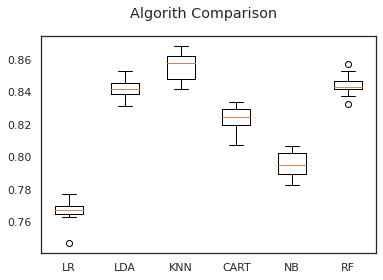

In [445]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [446]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 85.17103663830527%
[[8012  699]
 [1009 1798]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      8711
           1       0.72      0.64      0.68      2807

    accuracy                           0.85     11518
   macro avg       0.80      0.78      0.79     11518
weighted avg       0.85      0.85      0.85     11518



In [447]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
predictions = lda.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 83.62562944955721%
[[8047  664]
 [1222 1585]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      8711
           1       0.70      0.56      0.63      2807

    accuracy                           0.84     11518
   macro avg       0.79      0.74      0.76     11518
weighted avg       0.83      0.84      0.83     11518



In [448]:
rf = RandomForestClassifier(n_estimators=250,max_features=5)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 84.10314290675464%
[[7967  744]
 [1087 1720]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      8711
           1       0.70      0.61      0.65      2807

    accuracy                           0.84     11518
   macro avg       0.79      0.76      0.77     11518
weighted avg       0.84      0.84      0.84     11518



In [449]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [450]:
grid = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']},
  

In [451]:
print(grid.best_score_)

0.8661992937071286


In [452]:
print(grid.best_params_)

{'weights': 'uniform', 'n_neighbors': 22}


In [294]:
print(grid.best_score_)

0.8678924158309457


In [295]:
print(grid.best_params_)

{'n_neighbors': 30, 'weights': 'uniform'}


In [453]:
test_pred_100 = grid.predict(Y)
# test_pred_100 = knn.predict(Y)
# test_pred_100 = gbm.predict(Y)
# test_pred_100 = rfc_100.predict(Y)

In [454]:
test_pred_100 = pd.DataFrame(test_pred_100, columns=['Gaji'])

In [455]:
jawaban = pd.concat([testid, test_pred_100], axis=1, sort=False)

In [456]:
jawaban.to_csv('prediksi.csv',index=False)

In [457]:
jawaban

,id,Gaji
0,47933,0
1,44213,0
2,20823,1
3,40565,0
4,9860,0
...,...,...
9594,13587,0
9595,33231,0
9596,18614,0
9597,37566,0


In [ ]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

In [ ]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

In [ ]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=train_df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
# g = sns.heatmap(X_train.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
# plt.show()

In [ ]:
# drop the least important feature from X_train and X_test
X_train = X_train.drop(['Pekerjaan_Tentara', 'Pekerjaan_Asisten Rumah Tangga', 'Kelas Pekerja_Tanpa di Bayar', 'Kelas Pekerja_Tidak Pernah Bekerja'], axis=1)
X_test = X_test.drop(['Pekerjaan_Tentara', 'Pekerjaan_Asisten Rumah Tangga', 'Kelas Pekerja_Tanpa di Bayar', 'Kelas Pekerja_Tidak Pernah Bekerja'], axis=1)

In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
# Predict on the test set results
y_pred = clf.predict(X_test)
# Check accuracy score 
print('Model accuracy score with native_country_41 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores